# Introduction to effector's API

In [1]:
import effector
import numpy as np

In [2]:
np.random.seed(21)

In [3]:
model = effector.models.DoubleConditionalInteraction()
predict = model.predict
jacobian = model.jacobian

In [4]:
dist = effector.datasets.IndependentUniform(dim=3, low=-1, high=1)
data = dist.generate_data(n=200)

## Global Effects

### Simple API - use the defaults

In [25]:
feature_names = ["feature_1", "feature_2", "feature_3"]
target_name = "Y"
axis_limits = np.stack([[-1]*3, [1]*3])
y_limits = [-6, 8]
dy_limits = [-15, 15]

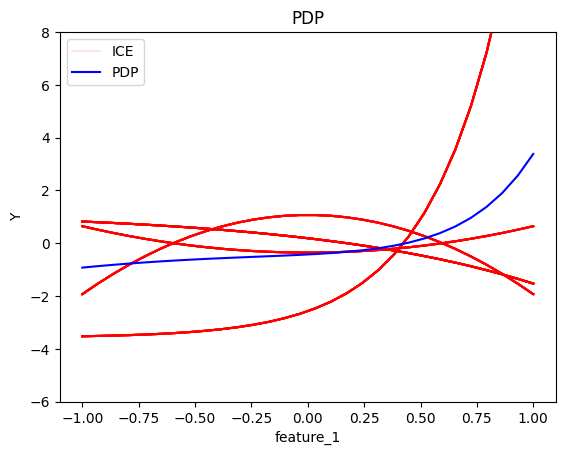

In [26]:
pdp = effector.PDP(data, predict, axis_limits, nof_instances="all", feature_names=feature_names, target_name=target_name)
pdp.plot(feature=0, y_limits=y_limits)

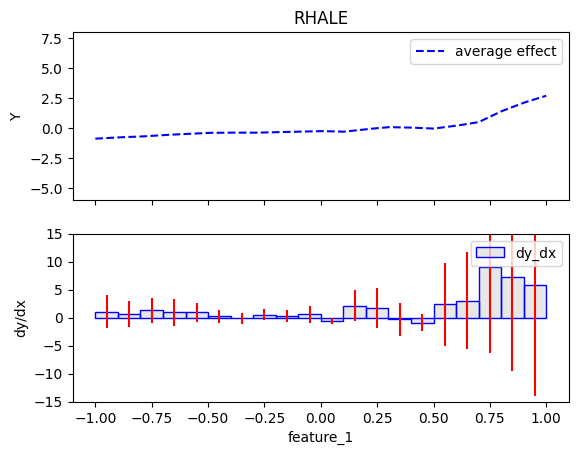

In [27]:
rhale = effector.RHALE(data, predict, jacobian, axis_limits=axis_limits, nof_instances="all", feature_names=feature_names, target_name=target_name)
rhale.plot(feature=0, y_limits=y_limits, dy_limits=dy_limits)

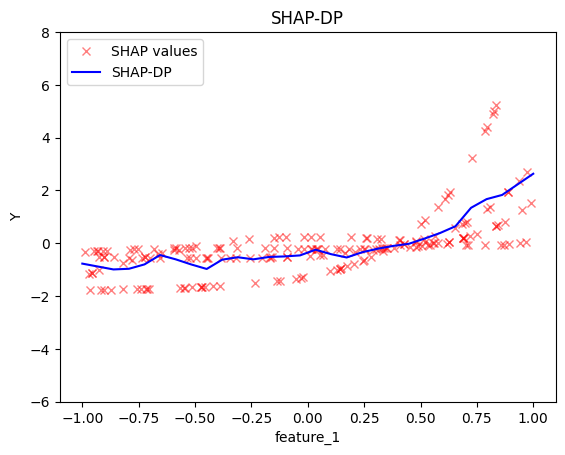

In [28]:
shap_dp = effector.ShapDP(data, predict, axis_limits=axis_limits, nof_instances="all", feature_names=feature_names, target_name=target_name)
shap_dp.plot(feature=0, y_limits=y_limits)

## Flexible API - Customize Fitting

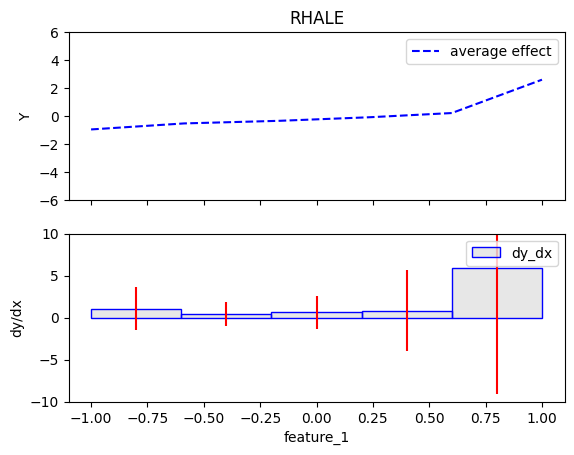

In [10]:
rhale = effector.RHALE(data, predict, jacobian, axis_limits=axis_limits, nof_instances="all", feature_names=feature_names, target_name=target_name)
rhale.fit(features=0, binning_method=effector.axis_partitioning.Fixed(nof_bins=5, min_points_per_bin=0.))
rhale.plot(feature=0, y_limits=y_limits, dy_limits=dy_limits)

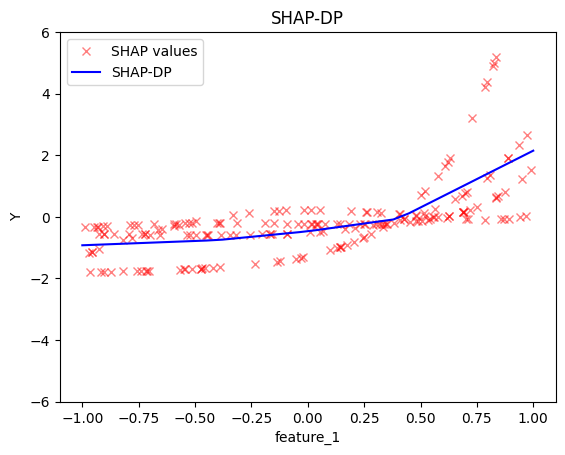

In [11]:
shap_dp = effector.ShapDP(data, predict, axis_limits=axis_limits, nof_instances="all", feature_names=feature_names, target_name=target_name)
shap_dp.fit(features=0, binning_method=effector.axis_partitioning.Fixed(nof_bins=5, min_points_per_bin=0.))
shap_dp.plot(feature=0, y_limits=y_limits)

## Regional Effect

### Simple API - use the defaults

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.69it/s]




Feature 0 - Full partition tree:
Node id: 0, name: feature_1, heter: 9.79 || nof_instances:   200 || weight: 1.00
        Node id: 1, name: feature_1 | feature_3 <= 0.0, heter: 0.26 || nof_instances:   200 || weight: 1.00
                Node id: 3, name: feature_1 | feature_3 <= 0.0 and feature_2 <= 0.0, heter: 0.00 || nof_instances:   200 || weight: 1.00
                Node id: 4, name: feature_1 | feature_3 <= 0.0 and feature_2  > 0.0, heter: 0.00 || nof_instances:   200 || weight: 1.00
        Node id: 2, name: feature_1 | feature_3  > 0.0, heter: 8.88 || nof_instances:   200 || weight: 1.00
                Node id: 5, name: feature_1 | feature_3  > 0.0 and feature_2 <= 0.0, heter: 0.00 || nof_instances:   200 || weight: 1.00
                Node id: 6, name: feature_1 | feature_3  > 0.0 and feature_2  > 0.0, heter: 0.00 || nof_instances:   200 || weight: 1.00
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 9.79
        L

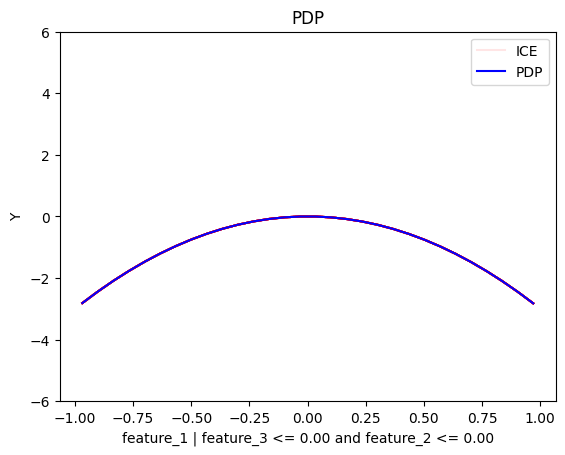

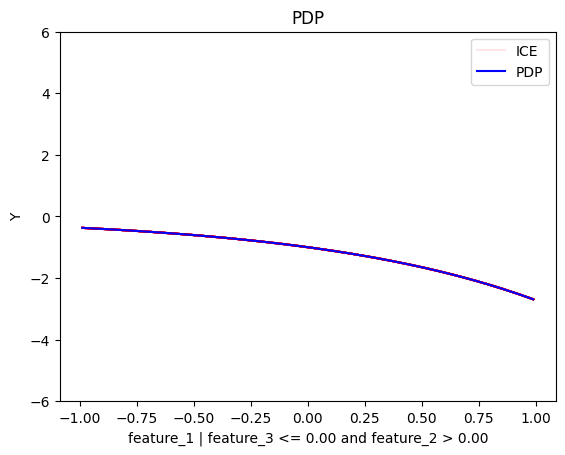

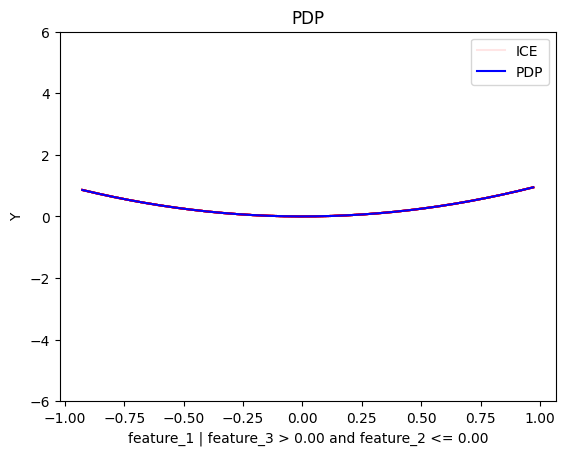

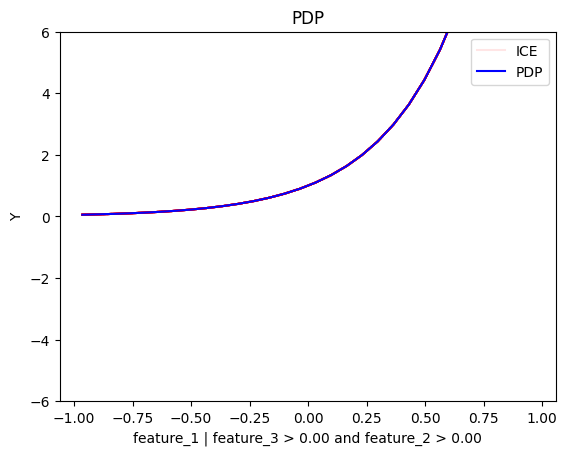

[None, None, None, None]

In [12]:
r_pdp = effector.RegionalPDP(data, predict, axis_limits=axis_limits, nof_instances="all", feature_names=feature_names, target_name=target_name)
r_pdp.summary(0)
[r_pdp.plot(feature=0, node_idx=node_idx, y_limits=y_limits) for node_idx in range (3, 7)]

  0%|                                                                                                                                                                                 | 0/1 [00:00<?, ?it/s]/home/givasile/miniconda3/envs/effector-dev/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/givasile/miniconda3/envs/effector-dev/lib/python3.10/site-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/givasile/miniconda3/envs/effector-dev/lib/python3.10/site-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

RegionalRHALE here: At a particular split, some bins had at most one point. I reject this split. 
 Error: Input array contains only NaN values. This is probably because in all bins there is at most one point, which is not enough to compute the bin variance. Please consider decreasing the number of bins or changing the bin splitting strategy.


Feature 0 - Full partition tree:
Node id: 0, name: feature_1, heter: 60.47 || nof_instances:   200 || weight: 1.00
        Node id: 1, name: feature_1 | feature_3 <= 0.0, heter: 2.35 || nof_instances:   200 || weight: 1.00
                Node id: 3, name: feature_1 | feature_3 <= 0.0 and feature_2 <= 0.0, heter: 0.02 || nof_instances:   200 || weight: 1.00
                Node id: 4, name: feature_1 | feature_3 <= 0.0 and feature_2  > 0.0, heter: 0.00 || nof_instances:   200 || weight: 1.00
        Node id: 2, name: feature_1 | feature_3  > 0.0, heter: 70.28 || nof_instances:   200 || weight: 1.00
                Node id: 5, name: feature_1 | fe

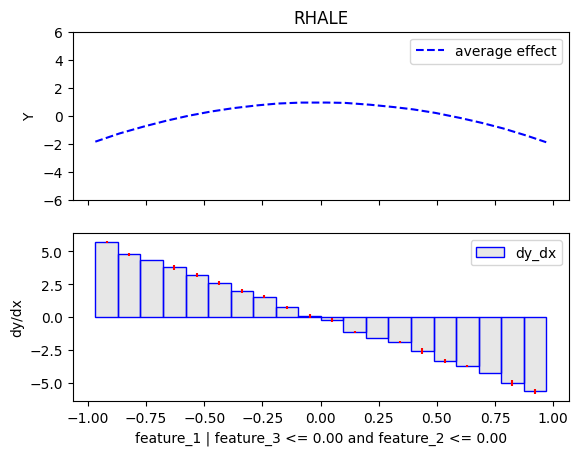

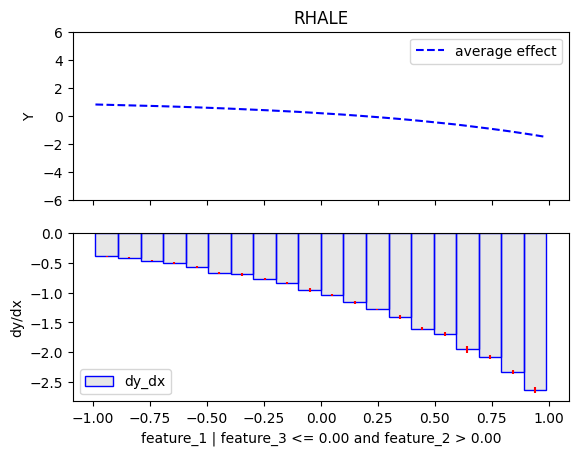

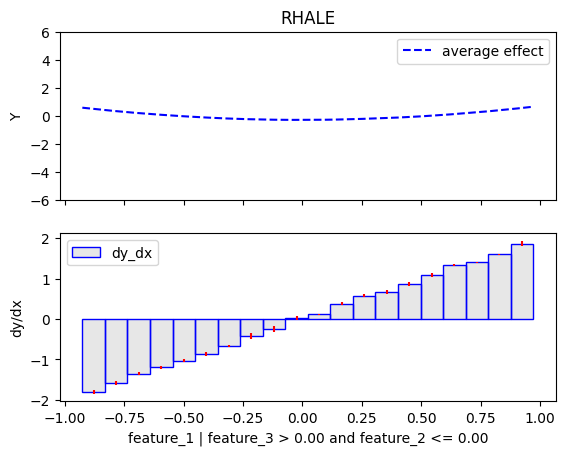

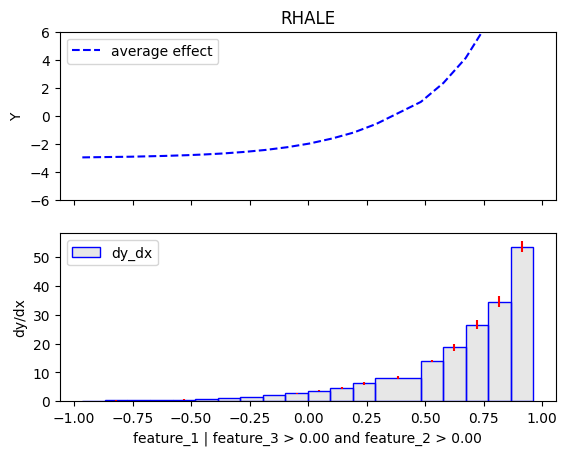

[None, None, None, None]

In [13]:
r_rhale = effector.RegionalRHALE(data, predict, jacobian, axis_limits=axis_limits, nof_instances="all", feature_names=feature_names, target_name=target_name)
r_rhale.summary(0)
[r_rhale.plot(feature=0, node_idx=node_idx, y_limits=y_limits) for node_idx in range (3, 7)]

In [14]:
r_shap_dp = effector.RegionalShapDP(data, predict, axis_limits=axis_limits, nof_instances="all", feature_names=feature_names, target_name=target_name)
r_shap_dp.summary(0)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.53it/s]

RegionalShapDP here: At a particular split, some bins had at most one point. I reject this split. 
 Error: Input array contains only NaN values. This is probably because in all bins there is at most one point, which is not enough to compute the bin variance. Please consider decreasing the number of bins or changing the bin splitting strategy.


Feature 0 - Full partition tree:
Node id: 0, name: feature_1, heter: 1.06 || nof_instances:   200 || weight: 1.00
        Node id: 1, name: feature_1 | feature_3 <= 0.0, heter: 0.08 || nof_instances:   200 || weight: 1.00
                Node id: 3, name: feature_1 | feature_3 <= 0.0 and feature_2 <= 0.0, heter: 0.00 || nof_instances:   200 || weight: 1.00
                Node id: 4, name: feature_1 | feature_3 <= 0.0 and feature_2  > 0.0, heter: 0.00 || nof_instances:   200 || weight: 1.00
        Node id: 2, name: feature_1 | feature_3  > 0.0, heter: 0.98 || nof_instances:   200 || weight: 1.00
                Node id: 5, name: feature_1 | fea

In [15]:
### Flexible API - customize fitting

In [16]:
r_shap_dp = effector.RegionalShapDP(data, predict, axis_limits=axis_limits, nof_instances="all", feature_names=feature_names, target_name=target_name)

space_partitioner = effector.partitioning.Regions(heter_small_enough=0.)
axis_partitioner = effector.axis_partitioning.Greedy(init_nof_bins=10, min_points_per_bin=0.)
r_shap_dp.fit(features=0, space_partitioner=space_partitioner, binning_method=axis_partitioner)
r_shap_dp.summary(features=0)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.86it/s]

RegionalShapDP here: At a particular split, some bins had at most one point. I reject this split. 
 Error: Input array contains only NaN values. This is probably because in all bins there is at most one point, which is not enough to compute the bin variance. Please consider decreasing the number of bins or changing the bin splitting strategy.


Feature 0 - Full partition tree:
Node id: 0, name: feature_1, heter: 1.04 || nof_instances:   200 || weight: 1.00
        Node id: 1, name: feature_1 | feature_3 <= 0.0, heter: 0.08 || nof_instances:   200 || weight: 1.00
                Node id: 3, name: feature_1 | feature_3 <= 0.0 and feature_2 <= 0.0, heter: 0.00 || nof_instances:   200 || weight: 1.00
                Node id: 4, name: feature_1 | feature_3 <= 0.0 and feature_2  > 0.0, heter: 0.02 || nof_instances:   200 || weight: 1.00
        Node id: 2, name: feature_1 | feature_3  > 0.0, heter: 0.97 || nof_instances:   200 || weight: 1.00
                Node id: 5, name: feature_1 | fea

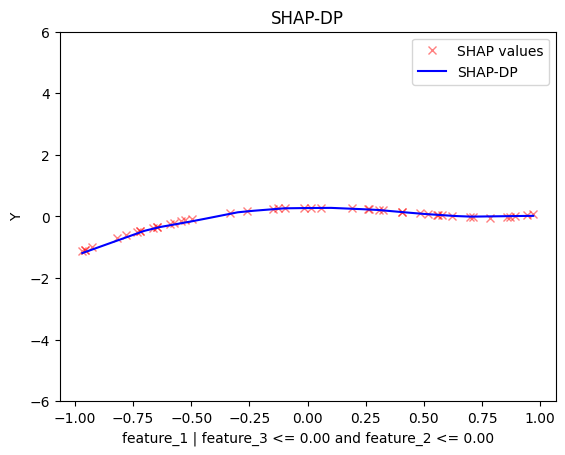

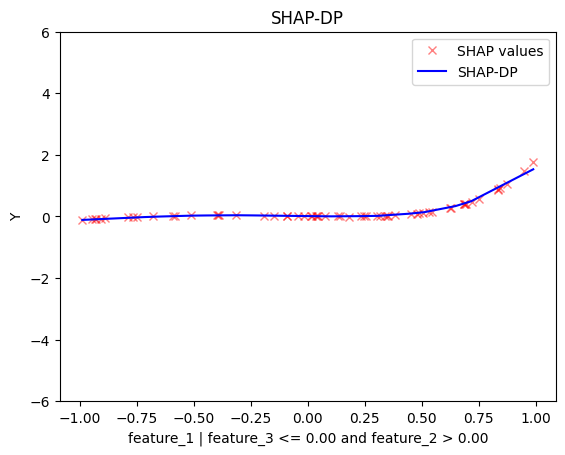

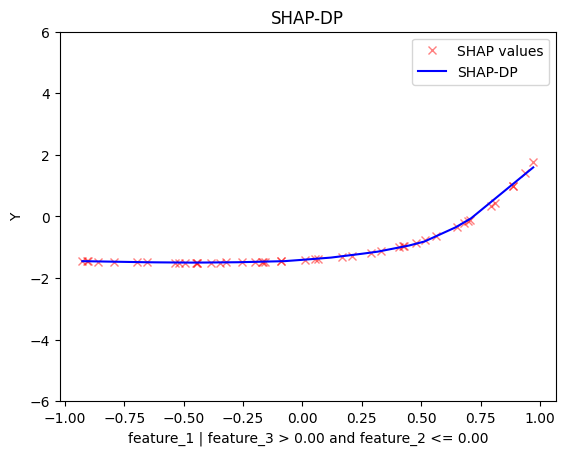

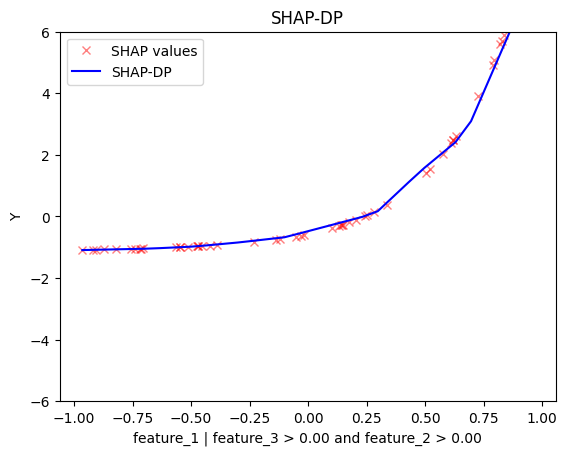

[None, None, None, None]

In [17]:
[r_shap_dp.plot(feature=0, node_idx=node_idx, y_limits=y_limits) for node_idx in range (3, 7)]